In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import string
from datetime import datetime,date
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Reading the data
df_train = pd.read_csv("C:\\Users\\aksha\\Downloads\\Consumer_Complaints_train.csv")
df_test = pd.read_csv("C:\\Users\\aksha\\Downloads\\Consumer_Complaints_test.csv")

In [4]:
# Top 10 rows of the dataset
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [5]:
#  Top 10 rows od dataset
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


Note : Do all the given task on both train and test dataset


### Print shape of train and test dataset

In [6]:
df_train.shape,df_test.shape

((358810, 18), (119606, 17))

### print column of train and test dataset

In [7]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [8]:
df_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

### Checking the dataTypes of both the dataset


In [9]:
data_types_train = pd.DataFrame(df_train.dtypes,columns = ['Train'])
data_types_test = pd.DataFrame(df_test.dtypes,columns = ['Test'])
data_types = pd.concat([data_types_train,data_types_test],axis = 1)
data_types

,Train,Test
Date received,object,object
Product,object,object
Sub-product,object,object
Issue,object,object
Sub-issue,object,object
Consumer complaint narrative,object,object
Company public response,object,object
Company,object,object
State,object,object
ZIP code,object,object


### Print missing values in percentage


In [10]:
missing_values_train = pd.DataFrame(df_train.isnull().sum()/len(df_train)*100,columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isnull().sum()/len(df_test)*100,columns = ['Test'])
missing_values = pd.concat([missing_values_train,missing_values_test],axis = 1)
missing_values

,Train,Test
Date received,0.000000,0.000000
Product,0.000000,0.000000
Sub-product,28.925058,28.997709
Issue,0.000000,0.000000
Sub-issue,61.139322,61.242747
Consumer complaint narrative,84.342688,84.186412
Company public response,81.067696,81.221678
Company,0.000000,0.000000
State,0.809063,0.782569
ZIP code,0.811293,0.783406


In [11]:
missing_values = ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']
df_train = df_train.drop(missing_values,axis = 1)
df_test = df_test.drop(missing_values,axis = 1)


### Extracting Day, Month, and Year from Date Received Column and create new fields for a month, year, and day 

In [12]:
import datetime as dt
df_train['Date received'] = pd.to_datetime(df_train['Date received'])
df_train['day'] = df_train['Date received'].dt.day
df_train['month'] = df_train['Date received'].dt.month
df_train['year'] = df_train['Date received'].dt.year

In [13]:
df_test['Date received'] = pd.to_datetime(df_test['Date received'])
df_test['day'] = df_test['Date received'].dt.day
df_test['month'] = df_test['Date received'].dt.month
df_test['year'] = df_test['Date received'].dt.year
 

In [14]:
df_train['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])
df_test['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])

In [15]:
df_train

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day,month,year
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,2015
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,14,4,2014
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,14,3,2013
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,1,2,2013
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,25,6,2015


### Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”

In [16]:
df_train['Days held'] = df_train['Date sent to company'] - df_train['Date received']
df_test['Days held'] = df_test['Date sent to company'] - df_test['Date received']


In [17]:
df_train['Days held'] = df_train['Days held'].astype('timedelta64[D]').astype(int)
df_test['Days held'] = df_test['Days held'].astype('timedelta64[D]').astype(int)


In [18]:
df_train['Days held'].dtype

dtype('int32')

### Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields


In [19]:
df_train = df_train.drop(['Date received','Date sent to company','ZIP code','Complaint ID'],axis = 1)
df_test = df_test.drop(['Date received','Date sent to company','ZIP code','Complaint ID'],axis = 1)

In [20]:
df_train.isnull().sum()

Product                            0
Issue                              0
Company                            0
State                           2903
Submitted via                      0
Company response to consumer       0
Timely response?                   0
Consumer disputed?                 0
day                                0
month                              0
year                               0
Days held                          0
dtype: int64

In [21]:
df_test.isnull().sum()

Product                           0
Issue                             0
Company                           0
State                           936
Submitted via                     0
Company response to consumer      0
Timely response?                  0
day                               0
month                             0
year                              0
Days held                         0
dtype: int64

### Imputing Null value in “State” by Mode

In [22]:
df_train['State'] = df_train['State'].fillna(df_train['State'].mode)

In [23]:
df_test['State'] = df_test['State'].fillna(df_train['State'].mode)

In [24]:
df_train.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
day                             0
month                           0
year                            0
Days held                       0
dtype: int64

In [25]:
df_test.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
day                             0
month                           0
year                            0
Days held                       0
dtype: int64

In [26]:
week_train = []
for i in df_train['day']:
    if i < 8:
        week_train.append(1)
    elif i >=8 and i <16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train['Week received'] = week_train
week_test = []
for i in df_test['day']:
    if i <8:
        week_test.append(1)
    elif i >= 8and i <16:
        week_test.append(2)
    elif i>=16 and i <22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test['Week received'] = week_test

        

### Drop "day" column

In [27]:
df_train = df_train.drop(['day'],axis = 1)


In [28]:
df_test = df_test.drop(['day'],axis = 1)

In [29]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,month,year,Days held,Week received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,10,2015,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,12,2013,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,2016,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,0,4


In [30]:
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,month,year,Days held,Week received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,1,2015,270,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,6,2016,-423,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,9,2015,-609,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,5,2016,-74,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,2016,-524,1


In [31]:
disputed_cons = df_train[df_train['Consumer disputed?'] == "Yes"]

In [32]:
disputed_cons

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,month,year,Days held,Week received
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,4,2015,0,4
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,1,2015,0,4
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,Yes,1,2014,5,2
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,Yes,12,2015,0,1
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,4,2012,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
358787,Mortgage,Credit decision / Underwriting,JPMorgan Chase & Co.,<bound method Series.mode of 0 GA\n1 ...,Postal mail,Closed with explanation,Yes,Yes,5,2014,5,4
358791,Mortgage,"Loan modification,collection,foreclosure",Bank of America,TX,Referral,Closed with explanation,Yes,Yes,8,2013,1,2
358797,Debt collection,Cont'd attempts collect debt not owed,"Convergent Resources, Inc.",IN,Web,Closed with explanation,Yes,Yes,6,2016,0,3
358798,Credit reporting,Incorrect information on credit report,Equifax,IL,Web,Closed with non-monetary relief,Yes,Yes,2,2013,0,4


### Plot bar graph of the total no of disputes of consumers with the help of seaborn


Text(0, 0.5, 'Count')

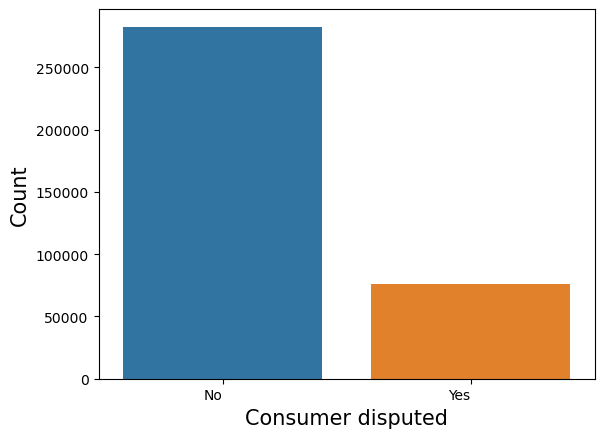

In [33]:
sns.countplot(x = 'Consumer disputed?',data = df_train)
plt.xticks(fontsize = 10,ha = 'right')
plt.yticks(fontsize = 10)
plt.xlabel('Consumer disputed',fontsize = 15)
plt.ylabel('Count',fontsize = 15)

### Plot bar graph of the total no of disputes products-wise with the help of seaborn

Text(0, 0.5, 'count')

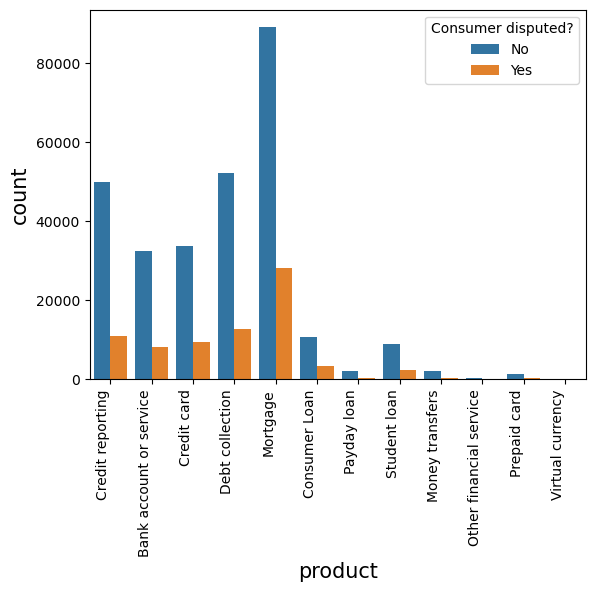

In [34]:
sns.countplot(x ='Product',hue = 'Consumer disputed?',data = df_train)
plt.xticks(rotation = 90,fontsize = 10,ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("product",fontsize=  15)
plt.ylabel("count",fontsize = 15)


### Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn

Text(0, 0.5, 'count')

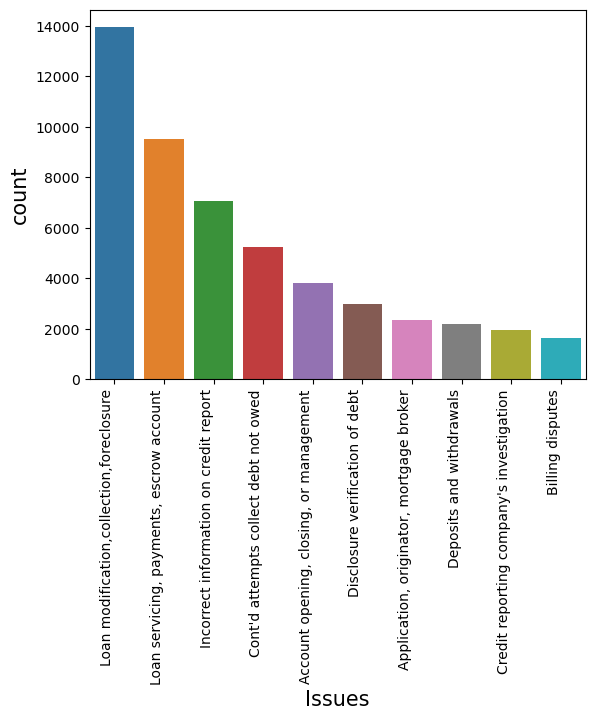

In [35]:
top_issues_disputes = disputed_cons['Issue'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index,y = top_issues_disputes.values)
plt.xticks(rotation = 90,fontsize = 10,ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Issues",fontsize = 15)
plt.ylabel("count",fontsize = 15)



### Plot bar graph of the total no of disputes by State with Maximum Disputes

Text(0, 0.5, 'count')

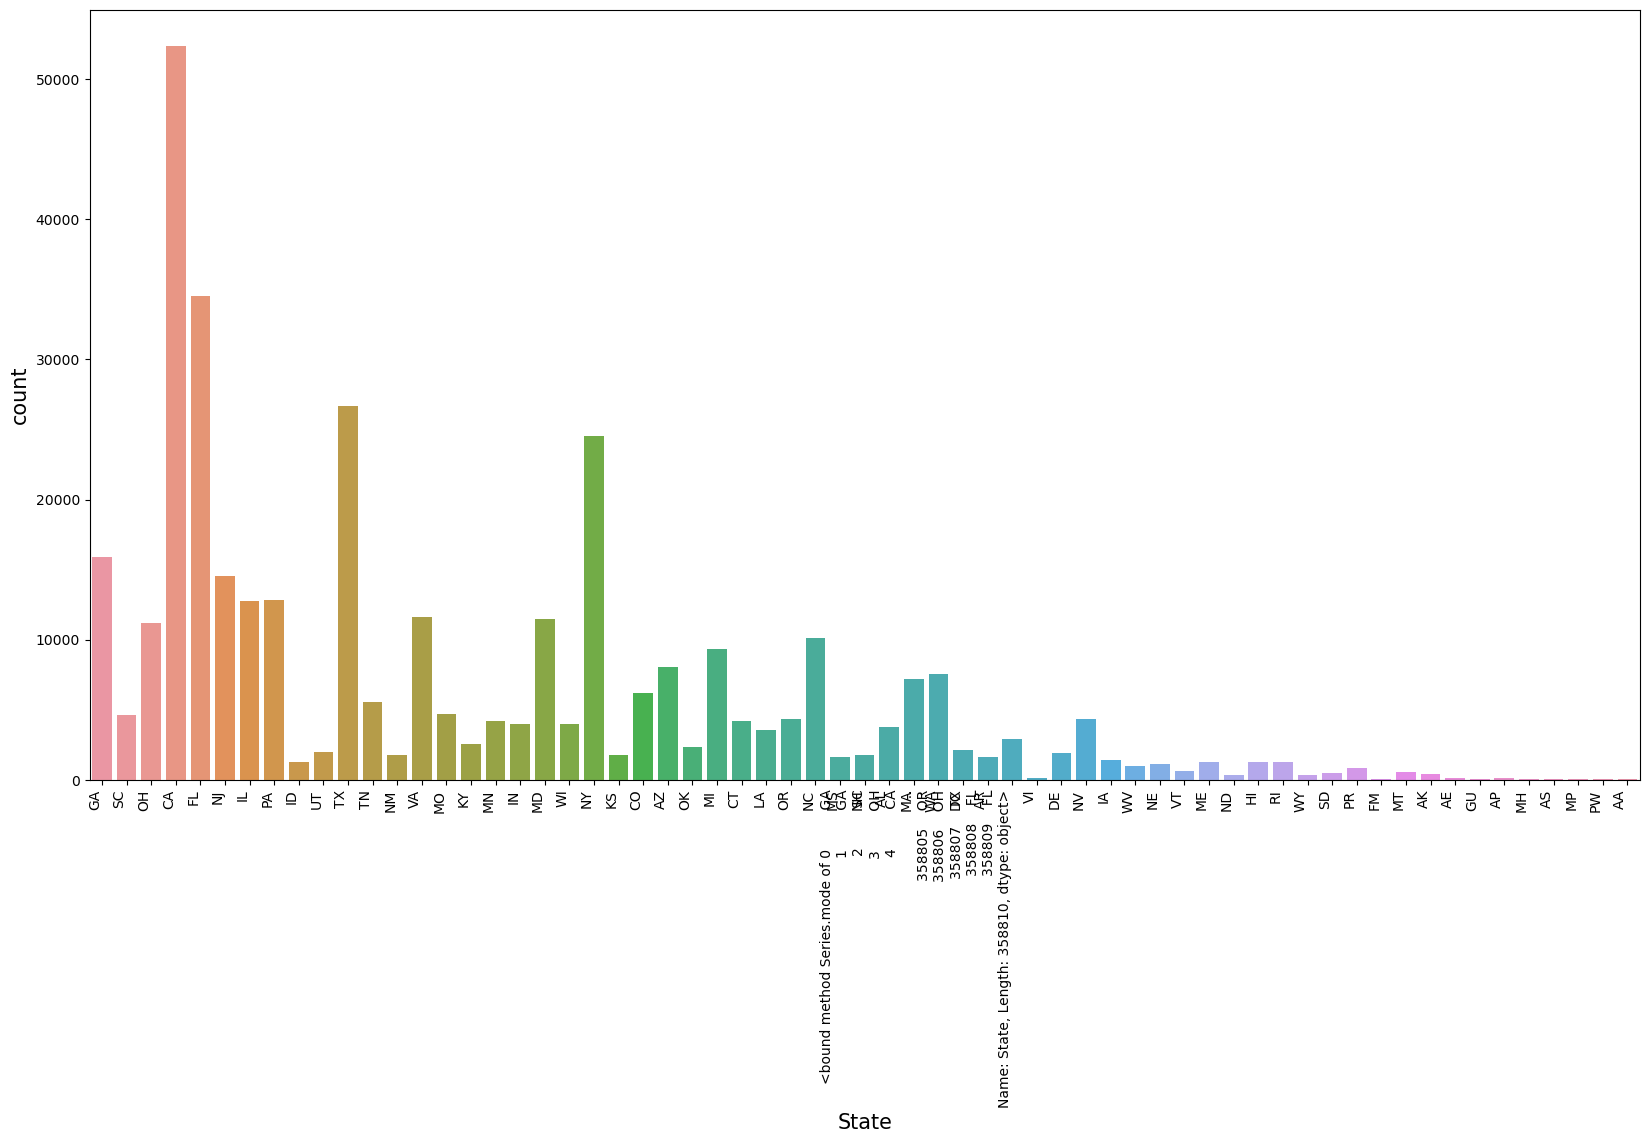

In [36]:
fig , ax = plt.subplots(figsize = (20,10))
sns.countplot(x = df_train['State'])
plt.xticks(rotation = 90,fontsize = 10,ha = 'right')
plt.yticks(fontsize = 10)
plt.xlabel('State',fontsize = 15)
plt.ylabel('count',fontsize  =15)

### Plot bar graph of the total no of disputes Submitted Via different source

Text(0, 0.5, 'Count')

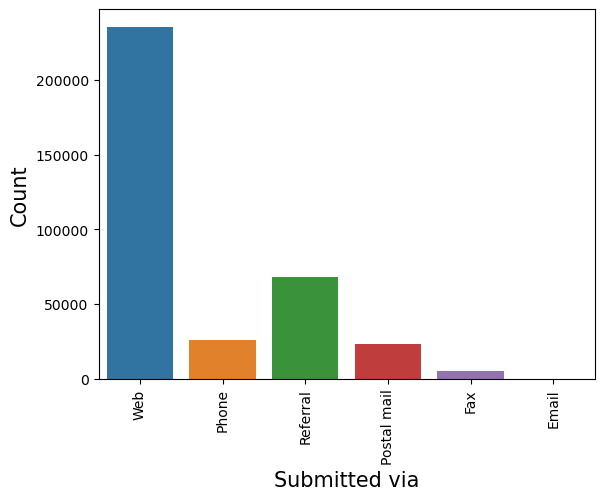

In [37]:
sns.countplot(x = df_train['Submitted via'])
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Submitted via",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

### Plot bar graph of the total no of disputes where the Company's Response to the Complaints

Text(0, 0.5, 'count')

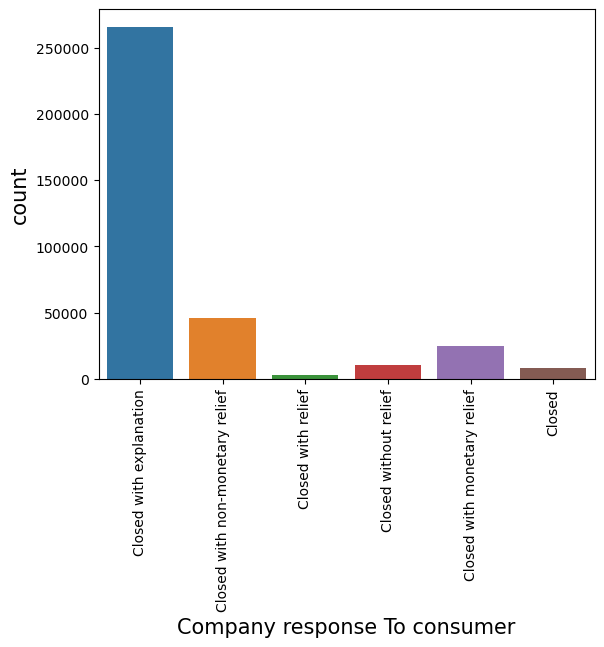

In [38]:
sns.countplot(x = df_train['Company response to consumer'])
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Company response To consumer",fontsize = 15)
plt.ylabel("count",fontsize = 15 )

### Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes

Text(0, 0.5, 'Count')

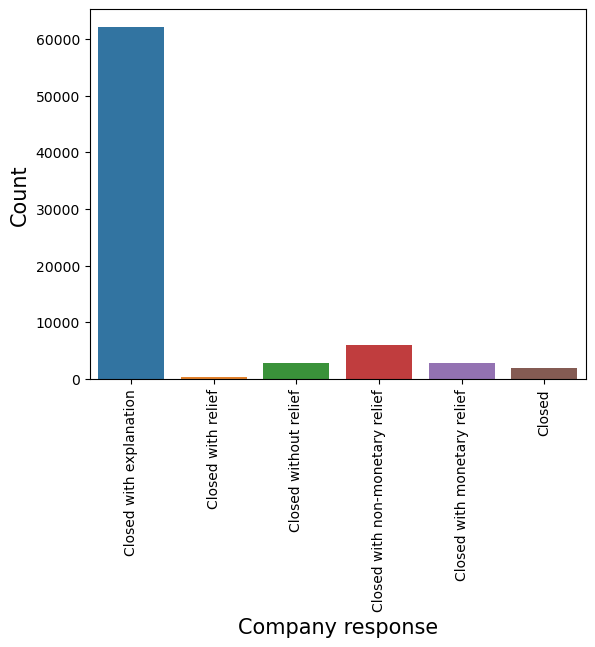

In [39]:
sns.countplot(x = "Company response to consumer",data = disputed_cons)
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Company response", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

### Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response

Text(0, 0.5, 'count')

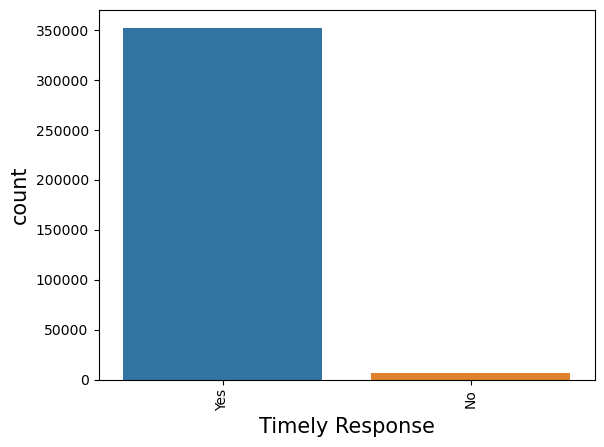

In [40]:
sns.countplot(x = "Timely response?",data = df_train)
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Timely Response",fontsize = 15)
plt.ylabel("count",fontsize  =15)

### Plot bar graph of the total no of disputes over Year Wise Complaints

Text(0, 0.5, 'Count')

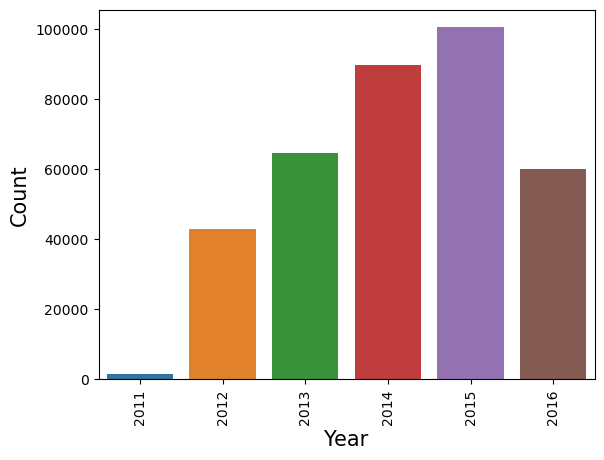

In [41]:
sns.countplot(x = 'year',data = df_train)
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

### Plot bar graph of the total no of disputes over Year Wise Disputes

Text(0, 0.5, 'Count')

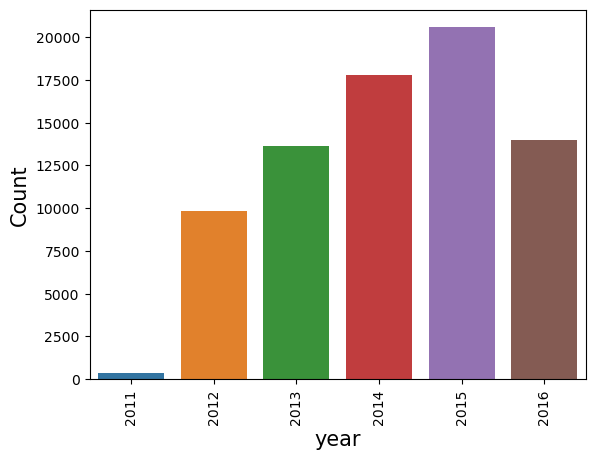

In [42]:
sns.countplot(x =  "year",data = disputed_cons)
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize  = 10)
plt.xlabel("year",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

### Plot bar graph of Top Companies with Highest Complaints

Text(0, 0.5, 'Count')

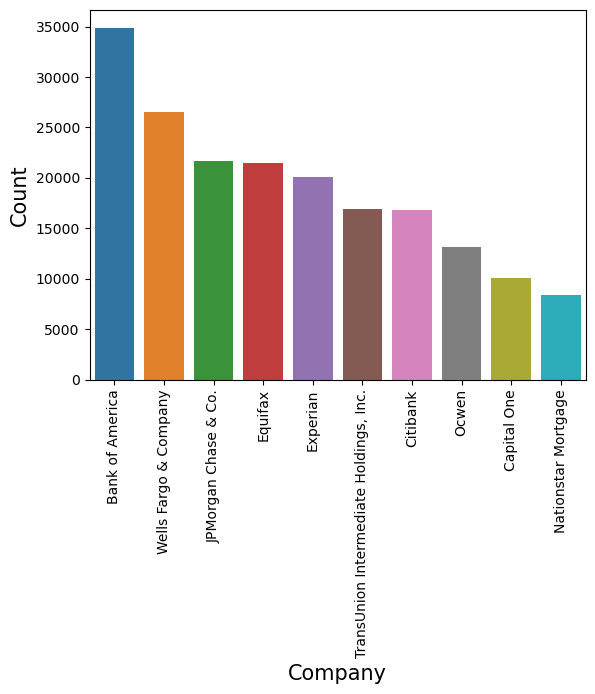

In [43]:
Company_with_highest_complaint = df_train['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = Company_with_highest_complaint.index,y = Company_with_highest_complaint.values)
plt.xticks(rotation = 90,fontsize=  10)
plt.yticks(fontsize = 10)
plt.xlabel("Company",fontsize =15)
plt.ylabel("Count",fontsize = 15 )

### Converte all negative days held to zero (it is the time taken by the authority that can't be negative

In [44]:
df_train.describe()

,month,year,Days held,Week received
count,358810.000000,358810.000000,358810.000000,358810.000000
mean,6.151858,2014.183629,4.456339,2.582531
std,3.356024,1.268063,16.741676,1.141400
min,1.000000,2011.000000,-1.000000,1.000000
25%,3.000000,2013.000000,0.000000,2.000000
50%,6.000000,2014.000000,1.000000,3.000000
75%,9.000000,2015.000000,4.000000,4.000000
max,12.000000,2016.000000,993.000000,4.000000


In [45]:
df_train.shape

(358810, 12)

In [46]:
df_test.shape

(119606, 11)

In [47]:
df_test.shape

(119606, 11)

In [48]:
df_test.describe()

,month,year,Days held,Week received
count,119606.000000,119606.000000,119606.000000,119606.000000
mean,6.144366,2014.183962,6.532549,2.585330
std,3.346970,1.266613,636.684464,1.141019
min,1.000000,2011.000000,-1695.000000,1.000000
25%,3.000000,2013.000000,-438.000000,2.000000
50%,6.000000,2014.000000,6.000000,3.000000
75%,9.000000,2015.000000,453.750000,4.000000
max,12.000000,2016.000000,1735.000000,4.000000


In [49]:
days_held_train = []
for i in df_train['Days held']:
    if i < 0:
        days_held_train.append(0)
    else:
        days_held_train.append(1)
df_train['days_held'] = days_held_train
days_held_test = []
for i in df_test['Days held']:
    if i < 0:
        days_held_test.append(0)
    else:
        days_held_test.append(1)
df_test['days_held'] = days_held_test

In [50]:
# Drop negative days held coulmn
df_train = df_train.drop("Days held",axis = 1)


In [51]:
df_test = df_test.drop("Days held",axis = 1)

## Test Pre-Processing

In [52]:
relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x:wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if w not in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if w not in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos ='v') for w in text]
    return lem_text
lemmatize_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatize_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatize_data_train.apply(lambda x: stem_text(x))
stemmed_data_test = lemmatize_data_test.apply(lambda x: stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))


In [53]:
clean_data_test.shape

(119606,)

In [54]:
df_train['Issue cleaned'] = clean_data_train
df_test['Issue cleaned'] = clean_data_test
df_train = df_train.drop('Issue',axis = 1)
df_test = df_test.drop('Issue',axis = 1)

### Drop Unnecessary Columns for the Model Buildinglike:'Company', 'State', 'Year_Received', 'Days_held'


In [55]:
drop_cols = ['Company', 'State', 'year', 'days_held']
df_train = df_train.drop(drop_cols,axis = 1)
df_test = df_test.drop(drop_cols,axis = 1)

In [56]:
df_train_new = []
for i in df_train['Consumer disputed?']:
    if i == 'Yes':
        df_train_new.append(1)
    else:
        df_train_new.append(0)
df_train['Consumer disputed?'] = df_train_new        
        

In [57]:
df_train

,Product,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,month,Week received,Issue cleaned
0,Credit reporting,Web,Closed with explanation,Yes,0,10,2,incorrect inform on credit report
1,Bank account or service,Web,Closed with explanation,Yes,1,4,4,deposit and withdraw
2,Credit card,Phone,Closed with non-monetary relief,Yes,0,12,3,other
3,Debt collection,Referral,Closed with explanation,Yes,0,3,1,disclosur verif of debt
4,Debt collection,Web,Closed with explanation,Yes,1,1,4,disclosur verif of debt
...,...,...,...,...,...,...,...,...
358805,Credit reporting,Web,Closed with non-monetary relief,Yes,0,4,2,incorrect inform on credit report
358806,Mortgage,Referral,Closed with non-monetary relief,Yes,0,3,2,loan modif collect foreclosur
358807,Credit card,Web,Closed,Yes,1,2,1,payoff process
358808,Debt collection,Phone,Closed with non-monetary relief,Yes,0,6,4,cont d attempt collect debt not owe


### Create Dummy Variables for categorical features and concat with the original data frame\like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?

In [58]:
dum_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_train_dummies = pd.get_dummies(df_train[dum_cols],prefix_sep = '_',drop_first = True)
df_test_dummies = pd.get_dummies(df_test[dum_cols],prefix_sep = '_',drop_first =  True)

### Concate dummmy variable and drop orignal column

In [59]:
df_train = df_train.drop(dum_cols,axis = 1)
df_test = df_test.drop(dum_cols,axis  = 1)
df_train = pd.concat([df_train,df_train_dummies],axis = 1)
df_test = pd.concat([df_test,df_test_dummies],axis = 1)

In [60]:
df_train.shape

(358810, 26)

In [61]:
df_test.shape

(119606, 25)

In [62]:
df_train.head()

,Consumer disputed?,month,Week received,Issue cleaned,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,0,10,2,incorrect inform on credit report,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,1,4,4,deposit and withdraw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0,12,3,other,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,3,1,disclosur verif of debt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,1,1,4,disclosur verif of debt,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [63]:
df_test.head()

,month,Week received,Issue cleaned,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,1,3,custom servic custom relat,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,6,4,payment to acct not credit,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,9,1,credit line increas decreas,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
3,5,3,problem when you be unabl to pay,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,7,1,improp contact or share of info,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [64]:
df_train['Issue cleaned'].shape

(358810,)

In [65]:
df_test['Issue cleaned'].shape

(119606,)

## Claculating TF- IDF

In [66]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issue cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issue cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


In [67]:
issues_test.shape

(119606, 167)

In [68]:
df_train = df_train.drop('Issue cleaned', axis = 1)
df_test = df_test.drop('Issue cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

In [69]:
df_train.head()

,Consumer disputed?,month,Week received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399029,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469431,0.0,0.0,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.596349,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,0,

In [70]:
df_test.head(30)

,month,Week received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.874274,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.437137,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211085,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.000000,0.753491,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.243968,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0

## Checking the shape of the dataset

In [71]:
df_train.shape,df_test.shape

((358810, 193), (119606, 192))

### Scaling the dataset

In [72]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train.drop('Consumer disputed?',axis = 1))
                              ,columns = df_test.columns)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test),columns = df_test.columns)

### Do feature selection with the help of PCA


In [73]:
df_train_scaled.shape,df_test_scaled.shape

((358810, 192), (119606, 192))

In [74]:
pca_columns = []
for i in range(df_train_scaled.shape[1]):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled),columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_,columns = ['Explained info']).sort_values(by = 'Explained info',ascending = False)

imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum.head(60)


,Variable,Importance
0,PC1,Explained info 0.0 dtype: float64
1,PC2,Explained info 0.035882 dtype: float64
2,PC3,Explained info 0.069329 dtype: float64
3,PC4,Explained info 0.10149 dtype: float64
4,PC5,Explained info 0.128148 dtype: float64
5,PC6,Explained info 0.153022 dtype: float64
6,PC7,Explained info 0.177157 dtype: float64
7,PC8,Explained info 0.199399 dtype: float64
8,PC9,Explained info 0.221115 dtype: float64
9,PC10,Explained info 0.242562 dtype: float64


### Select Top Feature with cover 80 percent of the information

In [75]:
pca_columns = []
for i in range(53):
    pca_columns.append("PC" + str(i+1))
pca_model = PCA(n_components = 53)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled),columns = pca_columns)
    


In [76]:
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,5.356863,-2.269659,-1.152936,-1.027732,0.162163,-0.915496,-0.481079,0.338863,0.085618,-0.101052,-0.199889,0.744933,-0.278487,-0.284071,-0.287126,0.255710,-0.168824,-0.037825,0.380307,0.030252,-0.014616,0.077111,-0.596092,0.006267,-0.379880,0.818873,0.056375,-0.408830,0.041576,-0.551681,-0.096779,0.120405,-0.625331,-0.000493,-0.041044,0.021527,-0.132571,0.095121,0.166975,-0.053994,0.070959,0.076887,-0.002735,0.174152,-0.057883,0.591361,-0.072987,-0.697063,-0.336188,0.485359,0.611341,-0.413113,0.123067
1,-0.147105,0.019777,-0.052999,0.798970,-0.438165,-0.154339,1.476499,-0.277885,-0.867812,0.109796,0.058822,-1.520534,0.053210,5.702986,-1.429257,1.822270,-0.325876,-0.613187,0.032300,0.102664,-0.210303,0.001212,0.593631,0.030546,-0.239678,0.995867,-5.470330,1.412760,2.377892,-0.228634,0.208899,0.227104,0.602271,0.005532,-0.332746,0.075045,-0.209745,0.301624,-1.227955,-0.687130,0.131002,0.351016,0.042813,0.094645,-0.050688,0.614987,-0.653139,-0.463359,-0.938999,1.226171,1.245766,-0.168626,0.071921
2,0.157615,-0.003097,-0.005863,0.810201,-0.614563,0.028804,1.093454,0.109095,-1.045745,0.087824,-0.166675,-0.943879,0.488931,0.456996,0.087900,-0.995419,0.326540,0.269466,-0.123147,0.154625,0.005978,-0.729244,0.199517,-0.008475,0.889199,0.297984,-0.320571,0.291159,-1.413221,0.606296,-0.473932,-0.226001,-0.624871,-0.027470,0.115312,0.003549,0.117899,-0.184701,-0.113698,0.033559,-0.184260,-0.111101,-0.104791,-0.100794,0.334646,-0.976568,1.690348,1.053169,2.014998,-1.253747,-1.038839,0.235276,-0.530678
3,-0.817810,-0.912073,3.535459,0.336591,-0.904326,-0.164719,-0.587306,-1.259024,0.288723,-0.153048,3.133483,0.100129,1.144592,0.491134,-0.437838,-0.493782,-0.300546,5.605231,1.053265,-2.758659,-2.796803,-0.969462,2.897100,-0.112881,-2.221713,0.322119,0.718702,-0.252385,1.071284,-0.346151,-0.861825,0.873220,-0.033898,-0.186040,0.726806,-0.040596,-0.065249,-0.055976,-0.138832,0.038089,-0.083237,-0.090281,0.052296,0.040269,-0.139836,0.082681,0.398805,-0.237221,0.752578,-0.666074,-0.822109,0.104315,-0.066645
4,-0.509843,-1.051601,3.915096,0.487470,-0.841267,-0.061252,-0.677978,-1.393308,0.720345,-0.292466,3.017790,0.054929,1.394615,0.415040,-0.487891,-0.499111,-0.347213,5.613221,1.227404,-2.794638,-2.642425,-0.818919,2.394325,-0.122356,-2.145824,0.103132,1.077151,-0.150520,0.786120,-0.108314,-0.569282,0.765695,0.328782,-0.185057,0.631868,-0.009653,-0.106089,-0.022638,0.176822,-0.041212,0.029904,0.054310,0.021293,-0.066156,-0.074783,0.154710,-0.269405,-0.151384,-0.491080,0.430539,0.606485,-0.192687,0.114861


##  Same for the test Data

In [77]:
pca_model = PCA(n_components = 53)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled),columns = pca_columns)

In [78]:
df_pca_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,-0.129584,0.380581,-0.245575,1.356618,-1.032361,-0.133777,1.262260,0.375570,-1.049505,-0.422493,-0.187370,-1.695538,1.718873,0.669536,0.411413,-2.077741,-0.174458,0.716132,-0.321675,-0.036480,-0.148164,-0.573357,-0.192414,2.736647,1.461154,-0.390391,-0.203939,1.290565,-5.391560,0.972279,-2.642723,-0.264907,-0.660095,0.364088,-3.523541,-2.522169,17.356882,3.836794,0.933480,-0.772264,-1.734523,-0.951233,2.138558,1.817533,-0.551267,0.735221,-2.745660,1.223561,-1.546930,-1.588370,-0.082632,-0.264492,-1.920037
1,0.922327,1.553473,0.765619,0.347728,1.322069,4.121478,1.088981,2.540443,2.736004,0.697306,-1.152271,2.101198,1.603962,-0.112248,0.025701,5.605523,3.082501,0.724132,-3.504795,0.155199,-0.620437,0.791600,0.463510,4.366370,-0.075857,-2.374350,1.544685,4.091489,0.924683,-0.967428,-0.702096,-0.854268,-0.697026,1.749457,-0.358898,0.614146,0.215456,-0.450934,0.197412,-0.228460,-0.017484,0.471994,-0.184292,-0.031145,-0.589217,3.328292,-0.396587,-6.625235,-3.376734,5.252531,5.705304,4.116089,-2.212681
2,0.816318,-0.289937,-0.106992,1.441448,-0.726340,0.392019,1.691541,0.191583,-1.595884,0.682029,0.049493,-1.769400,0.655580,0.551611,-0.150974,-3.489217,-2.676964,4.102262,-2.059545,-1.038297,2.974369,-3.752911,-0.067161,21.704817,-2.513420,6.918266,-0.236669,-13.916228,9.815604,-0.970324,1.953387,-0.174692,0.206454,-1.452885,-0.013369,-0.434587,0.132198,0.332202,-0.077114,0.045992,-0.281536,-0.047284,-0.079831,-0.027656,-0.152637,-0.631703,-0.788481,-0.147142,0.776554,-0.458393,1.026861,-0.215974,0.085605
3,4.956143,12.125675,2.014009,-2.461303,6.552393,10.518080,-0.181466,-1.314188,0.387682,-0.301202,0.712492,-1.040065,0.959569,0.071597,0.227870,-0.261431,-0.489022,0.247132,0.377943,0.131719,0.319600,-0.392803,-0.957310,-0.702666,0.628383,-3.258089,-0.786686,-2.790835,-1.236082,-3.336138,0.156051,-0.980016,1.056141,0.040228,-0.103435,-0.187325,-0.122512,-0.043382,-0.064762,-0.005930,0.063163,-0.162321,-0.030449,0.002832,0.542281,1.498980,-0.278245,2.390646,-0.940889,0.093800,0.442969,-0.042779,0.069048
4,-0.054849,-0.565640,3.331546,4.384158,-2.562895,0.321311,-3.157867,-5.840596,3.968590,2.823239,10.433679,2.234142,1.708283,-1.869664,-3.097935,0.461973,0.095768,-1.984946,2.668083,4.477203,-2.322834,0.408329,-1.763089,1.739779,0.198169,-0.258081,-0.646623,0.101706,-0.445095,-0.417306,-0.466406,0.162012,-0.036273,-0.069628,0.335645,0.017068,0.046773,-0.110976,-0.030563,0.015634,-0.003220,-0.023145,-0.032097,0.025488,0.086212,-0.213495,0.097159,-0.437871,0.133645,-0.012027,-0.220972,0.081468,0.020839


### Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [79]:
x = df_pca_train
y = df_train['Consumer disputed?']

## Split the dataset into train an test datasets

In [80]:
X_train , X_test , Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 17)
x_test = df_pca_test

In [81]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,x_test.shape

((251167, 53), (107643, 53), (251167,), (107643,), (119606, 53))

## Model Building

In [82]:
from xgboost import XGBClassifier
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),KNeighborsClassifier(),XGBClassifier()]
model_names = ['LogisticRegression','DecisionTreeClassifier','RandomForestclassifier','AdaBoostClassifier','GradientBoostingClassifier','KNeighborsClassifier','XGBClassifier']
accuracy_train = []
accuracy_test = []
for model in models:
    model.fit(X_train,Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train.append(accuracy_score(y_pred_train,Y_train))
    accuracy_test.append(accuracy_score(y_pred_test,Y_test))
data = {'Modeling Algorithm':model_names,'Train Accuracy':accuracy_train,'Test Accuracy':accuracy_test}
data = pd.DataFrame(data)
data['Diffrence'] = ((np.abs(data['Train Accuracy'] - data['Test Accuracy'])) * 100)/data['Train Accuracy']
data.sort_values(by = 'Test Accuracy',ascending = False)
       
    

,Modeling Algorithm,Train Accuracy,Test Accuracy,Diffrence
0,LogisticRegression,0.787846,0.787390,0.057947
3,AdaBoostClassifier,0.787846,0.787390,0.057947
4,GradientBoostingClassifier,0.787858,0.787381,0.060642
6,XGBClassifier,0.788973,0.787102,0.237177
2,RandomForestclassifier,0.800790,0.775805,3.120007
1,DecisionTreeClassifier,0.800790,0.775768,3.124648
5,KNeighborsClassifier,0.767191,0.752246,1.948004


In [83]:
model_names

['LogisticRegression',
 'DecisionTreeClassifier',
 'RandomForestclassifier',
 'AdaBoostClassifier',
 'GradientBoostingClassifier',
 'KNeighborsClassifier',
 'XGBClassifier']

## Final model and prediction for the test file

LogisticRegression is the best model to build the model.

In [86]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_pred_test = lr.predict(x_test)
y_pred_test = pd.DataFrame(y_pred_test,columns = ['Prediction'])
y_pred_test.head()


,Prediction
0,0
1,1
2,0
3,0
4,0


## Export prediction To csv


In [87]:
y_pred_test.to_csv('Prediction.csv')